In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sklearn
import nltk as nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from collections import Counter
%matplotlib inline

In [301]:
amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t')
amazon.head(1)

,So there is no way for me to plug it in here in the US unless I go by a converter.,0
0,"Good case, Excellent value.",1


# Clean the Data

In [302]:
# Change the column names and look for words that could be used in our sentiment analysis to find positive reviews
amazon.columns = ['reviews', 'positive']
amazon['reviews'] = amazon['reviews'].str.lower()
amazon['positive'] = (amazon['positive'] == 1)
amazon.head(10)

,reviews,positive
0,"good case, excellent value.",True
1,great for the jawbone.,True
2,tied to charger for conversations lasting more...,False
3,the mic is great.,True
4,i have to jiggle the plug to get it to line up...,False
5,if you have several dozen or several hundred c...,False
6,if you are razr owner...you must have this!,True
7,"needless to say, i wasted my money.",False
8,what a waste of money and time!.,False
9,and the sound quality is great.,True


In [303]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [304]:
#Turn all the reviews into a string, then remove punctuation and stopwords to find a better list of words to use in your
#filter

s = ""

for i in amazon['reviews']:
    s += " " + i 

for i in s:
    if i in string.punctuation:
        s = s.replace(i,'') 

# Choose New Keywords for Model

In [305]:
s = s.split()
filtered_words = [word for word in s if word not in stopwords.words('english')]
Counter(filtered_words).most_common()

[('phone', 162),
 ('great', 97),
 ('good', 75),
 ('product', 55),
 ('quality', 49),
 ('headset', 47),
 ('works', 47),
 ('battery', 45),
 ('sound', 41),
 ('use', 41),
 ('one', 40),
 ('well', 38),
 ('ear', 35),
 ('would', 34),
 ('work', 34),
 ('dont', 31),
 ('like', 30),
 ('case', 29),
 ('ive', 28),
 ('excellent', 27),
 ('time', 27),
 ('price', 27),
 ('recommend', 26),
 ('really', 26),
 ('im', 24),
 ('best', 23),
 ('service', 23),
 ('get', 22),
 ('nice', 22),
 ('also', 22),
 ('2', 21),
 ('new', 20),
 ('love', 20),
 ('worked', 20),
 ('charger', 19),
 ('money', 19),
 ('buy', 19),
 ('item', 19),
 ('better', 19),
 ('ever', 19),
 ('car', 18),
 ('even', 18),
 ('comfortable', 17),
 ('bought', 17),
 ('first', 17),
 ('bluetooth', 17),
 ('easy', 17),
 ('could', 16),
 ('doesnt', 16),
 ('used', 16),
 ('poor', 15),
 ('happy', 15),
 ('reception', 15),
 ('waste', 14),
 ('two', 14),
 ('made', 14),
 ('still', 14),
 ('bad', 14),
 ('purchase', 14),
 ('cell', 14),
 ('worst', 14),
 ('far', 13),
 ('charge', 1

Create a new list of Keywords that have positive associations. 

'good', 'great', 'well', 'excellent', 'best', 'nice', 'love', 'highly', 'happy', 'impressed', 'cool', 'perfect', 'perfectly', 'helpful', 'awesome', 'pleased', 'beautiful', 'fantastic']

Now that we have new keywords lets go back to the classifier you created in the previous assignment


# Background
In this challenge I will build a Naive Bayes classifier to perform sentiment analysis on Amazon reviews looking for positive reviews. I will then see if the classifier translates well to another dataset. In this case, a dataset of Yelp reviews. 

This dataset was created for the Paper \"From Group to Individual Labels using Deep Features\", Kotzias et. al., KDD 2015. https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

In [306]:
# Change the column names and look for words that could be used in our sentiment analysis to find positive reviews
amazon.columns = ['reviews', 'positive']
amazon['reviews'] = amazon['reviews'].str.lower()
amazon['positive'] = (amazon['positive'] == 1)
amazon.head(10)

,reviews,positive
0,"good case, excellent value.",True
1,great for the jawbone.,True
2,tied to charger for conversations lasting more...,False
3,the mic is great.,True
4,i have to jiggle the plug to get it to line up...,False
5,if you have several dozen or several hundred c...,False
6,if you are razr owner...you must have this!,True
7,"needless to say, i wasted my money.",False
8,what a waste of money and time!.,False
9,and the sound quality is great.,True


In [307]:
amazon['positive'].value_counts()

True     500
False    499
Name: positive, dtype: int64

In [309]:
#Rather than using guesses, this time I have chosen 17 positive words from a list of the most commonly
#occuring words 
keywords = ['good', 'great', 'well', 'excellent', 'best', 'nice', 'love', 'highly', 'happy', 'impressed', 'cool',
           'perfectly', 'helpful', 'awesome', 'pleased', 'beautiful', 'fantastic', 'must']

for key in keywords:
    amazon[str(key)] = amazon.reviews.str.contains(
        str(key),
        case=True
    )

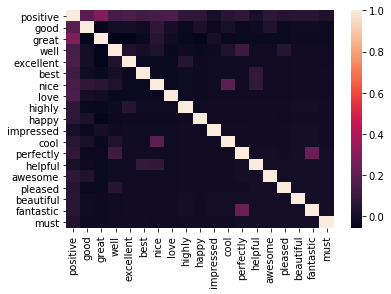

In [310]:
#Check to see if the words are correlated
sns.heatmap(amazon.corr())

# First Model
Now that we have chosen keywords and discovered that they show a strong independence from each other let's proceed. This time around I have chosen 17 rather than 9 words to use in my filter. Also rather than an educated guess of positive words, I analyzed the most common used words in the reviews and chose 17 examples that were commonly use and associated with positive reviews.

In [311]:
data = amazon[keywords]
target = amazon['positive']

In [312]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(fit_prior = False)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled reviews out of a total 999 reviews : 245


In [313]:
x = (target != y_pred).sum()
print("This model's accuracy is now " + str(1 - (x/999)) + " percent.")

This model's accuracy is now 0.7547547547547547 percent.


In [314]:
print("In my previous classifier, the model's accuracy was " + str(1 - (412/999)) + " percent.")

In my previous classifier, the model's accuracy was 0.5875875875875876 percent.


## Confusion Matrix

In [315]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[460,  39],
       [206, 294]])

## With Holdout Groups

In [316]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.79
Testing on Sample: 0.7547547547547547


## Cross Validation

In [317]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.84      , 0.75      , 0.81      , 0.75      , 0.8       ,
       0.71      , 0.66      , 0.74      , 0.75      , 0.68686869])

# Second Model

For this model I am going to remove some features in my classifier. I am going to remove some weak features in order to reduce the number of the False Positives or Type I errors my classifier is giving me. Hopefully this will improve the accuracy of my model.

In [318]:
# Change the column names and look for words that could be used in our sentiment analysis to find positive reviews
amazon2 = amazon[['reviews', 'positive']]

In [319]:
#Rather than using guesses, this time I have chosen 17 positive words from a list of the most commonly
#occuring words 
keywords2 = ['good', 'great', 'excellent', 'best', 'nice', 'love', 'highly', 'happy', 'impressed', 'cool',
           'perfectly', 'helpful', 'awesome', 'beautiful', 'fantastic']

for key in keywords2:
    amazon2[str(key)] = amazon2.reviews.str.contains(
        str(key),
        case=True
    )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [320]:
amazon2.head(10)

,reviews,positive,good,great,excellent,best,nice,love,highly,happy,impressed,cool,perfectly,helpful,awesome,beautiful,fantastic
0,"good case, excellent value.",True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,great for the jawbone.,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,the mic is great.,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,i have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,if you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,if you are razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,"needless to say, i wasted my money.",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,what a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,and the sound quality is great.,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


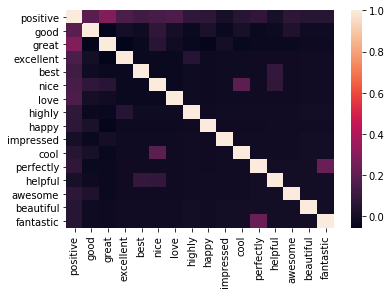

In [321]:
#Check to see if the words are correlated
sns.heatmap(amazon2.corr())

In [322]:
data = amazon2[keywords2]
target = amazon2['positive']

In [323]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(fit_prior = False)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled reviews out of a total 999 reviews : 266


In [324]:
x = (target != y_pred).sum()
print("This model's accuracy is now " + str(1 - (x/999)) + " percent.")

This model's accuracy is now 0.7337337337337337 percent.


In [325]:
print("In my previous classifier, the model's accuracy was " + str(1 - (245/999)) + " percent.")

In my previous classifier, the model's accuracy was 0.7547547547547547 percent.


In [326]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[469,  30],
       [236, 264]])

This model is about 2% less accurate than my previous model. However, the number of False Positives or Type I errors did decrease by 9 and the number of Negatives correctly Identified increase by 9. Unfortunately, the number of False Negatives increased by 30, the Number of Positively identified reviews decreased by 30. The model's Specificity increased but the Sensitivity decreased.

# Third Model

In [330]:

amazon['reviews'] = amazon['reviews'].str.lower()
amazon['positive'] = (amazon['positive'] == 1)
amazon['negative'] = (amazon['positive'] !=1)
amazon.head(10)

,reviews,positive,good,great,well,excellent,best,nice,love,highly,...,impressed,cool,perfectly,helpful,awesome,pleased,beautiful,fantastic,must,negative
0,"good case, excellent value.",True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,great for the jawbone.,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,the mic is great.,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,i have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,if you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,if you are razr owner...you must have this!,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,"needless to say, i wasted my money.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,what a waste of money and time!.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,and the sound quality is great.,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [332]:
amazon3 = amazon[['reviews', 'negative']]
amazon3.head(2)

,reviews,negative
0,"good case, excellent value.",False
1,great for the jawbone.,False


In [333]:
keywords3 = ['dont', 'poor', 'waste', 'bad', 'worst', 'problem', 'couldnt', 'disappoint', 'couldnt', 'low',
           'last', 'terrible', 'cheap', 'little', 'never', 'broke', 'horrible', 'junk', 'dropped', 'useless', 'difficult']

for key in keywords3:
    amazon3[str(key)] = amazon3.reviews.str.contains(
        str(key),
        case=True
    )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [334]:
amazon3.head(3)

,reviews,negative,dont,poor,waste,bad,worst,problem,couldnt,disappoint,...,terrible,cheap,little,never,broke,horrible,junk,dropped,useless,difficult
0,"good case, excellent value.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,great for the jawbone.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tied to charger for conversations lasting more...,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


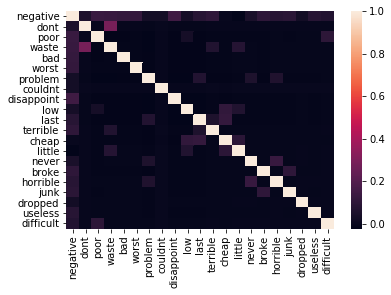

In [335]:
#Check to see if the words are correlated
sns.heatmap(amazon3.corr())

In [336]:
data = amazon3[keywords3]
target = amazon3['negative']

In [338]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(fit_prior = False)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled reviews out of a total 999 reviews : 351


In [339]:
x = (target != y_pred).sum()
print("This model's accuracy is now " + str(1 - (x/999)) + " percent.")

This model's accuracy is now 0.6486486486486487 percent.


In [340]:
print("In my previous classifier, the model's accuracy was " + str(1 - (266/999)) + " percent.")

In my previous classifier, the model's accuracy was 0.7337337337337337 percent.


In [341]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[475,  25],
       [326, 173]])

This time I reversed it and look to identify negative reviews. This was very good at Identify positive reviews but not great at identifying negative reviews. I was able to correctly identify 475 reviews as positive. But this was not very good at correctly identifying negative reviews(only 173).

# Fourth Model 

In [342]:
amazon4 = amazon[['reviews', 'negative']]

In [348]:
keywords4 = ['dont', 'poor', 'waste', 'bad', 'worst', 'problem', 'couldnt', 'disappoint', 'couldnt', 'low',
           'last', 'terrible', 'cheap', 'little', 'never', 'broke', 'horrible', 'junk', 'dropped', 'useless', 'difficult'
            , 'different', 'refund', 'disappointment', 'disappointing', 'hate', 'unreliable', 'weak', 'mistake', 'unfortunately',
            'awful', 'worthless', 'trouble', 'avoid', 'wont', 'failed', 'lacks']

for key in keywords4:
    amazon4[str(key)] = amazon4.reviews.str.contains(
        str(key),
        case=True
    )

In [344]:
amazon4.head()

,reviews,negative,dont,poor,waste,bad,worst,problem,couldnt,disappoint,...,weak,mistake,unfortunately,awful,worthless,trouble,avoid,wont,failed,lacks
0,"good case, excellent value.",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,great for the jawbone.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tied to charger for conversations lasting more...,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,the mic is great.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,i have to jiggle the plug to get it to line up...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [345]:
data = amazon4[keywords4]
target = amazon4['negative']

In [346]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(fit_prior = False)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled reviews out of a total 999 reviews : 325


This is not much better than my previous classifier

# Fifth Model

In [362]:
amazon5 = amazon[['reviews', 'positive']]

In [363]:
keywords5 = ['dont', 'poor', 'waste', 'bad', 'worst', 'problem', 'couldnt', 'disappoint', 'couldnt', 'low',
           'last', 'terrible', 'cheap', 'little', 'never', 'broke', 'horrible', 'junk', 'dropped', 'useless', 'difficult'
            , 'different', 'refund', 'disappointment', 'disappointing', 'hate', 'unreliable', 'weak', 'mistake', 'unfortunately',
            'awful', 'worthless', 'trouble', 'avoid', 'wont', 'failed', 'lacks', 'good', 'great', 'well', 'excellent', 'best', 'nice', 'love', 'highly', 'happy', 'impressed', 'cool',
           'perfectly', 'helpful', 'awesome', 'pleased', 'beautiful', 'fantastic', 'must']

for key in keywords5:
    amazon5[str(key)] = amazon5.reviews.str.contains(
        str(key),
        case=False
    )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


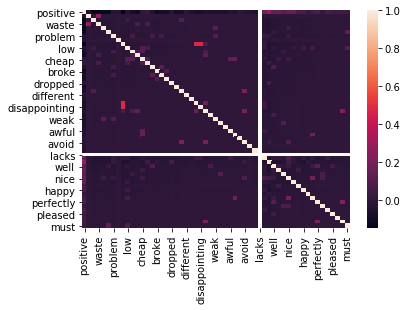

In [364]:
#Check to see if the words are correlated
sns.heatmap(amazon5.corr())

In [365]:
data = amazon5[keywords5]
target = amazon5['positive']

In [366]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB(fit_prior = False)

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled reviews out of a total 999 reviews : 237


In [367]:
x = (target != y_pred).sum()
print("This model's accuracy is now " + str(1 - (x/999)) + " percent.")

This model's accuracy is now 0.7627627627627628 percent.


In [368]:
print("In my previous classifier, the model's accuracy was " + str(1 - (351/999)) + " percent.")

In my previous classifier, the model's accuracy was 0.6486486486486487 percent.


In [369]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[464,  35],
       [202, 298]])

This is my best classifier so far. 